# Forberedelser labdag 05.11.2021
## Anton Brekke / antonabr@uio.no


## 1 Indre resistans i et voltmeter 

### 1.1.1
Potensial $U$ oppgitt som $U = U_0e^{-\frac{t}{\tau}},\;\tau\equiv RC$. Den naturlige logaritmen på begge sider vil gi:


\begin{align*}
\ln(U) &= \ln(U_0e^{-\frac{t}{\tau}}) \\
       &= \ln(U_0) + \ln(e^{-\frac{t}{\tau}}) \\
       &= -\frac{t}{\tau}\ln(e) + \ln(U_0) \\
       &= -\frac{t}{\tau} + \ln(U_0)
\end{align*}

Dermed plotter vi $\ln(U)$ på $t$, og ser hva slags resultater vi får. Jeg velger verdiene $\tau=10^{-2},\;U0=e^{-7}$, og $t\in[0,1]$, bare for å få testet det litt. 

Slope: -100.00, interception: -7.00


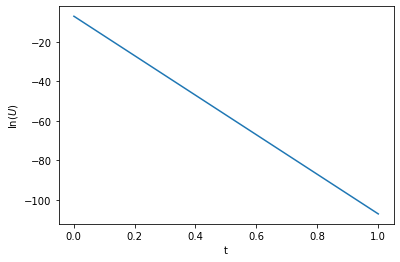

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

tau = 1e-2
U0 = np.exp(-7)
t = np.linspace(0.001, 1, 300)

U = U0*np.exp(-t/tau)

logU = np.log(U)

plt.plot(t, logU)
plt.xlabel('t'); plt.ylabel(r'$\ln(U)$')
p = np.polyfit(t, logU, 1)
print(f'Slope: {p[0]:.2f}, interception: {p[1]:.2f}')

Vi får en rett linje på formen $y=at + b$, der $y=\ln(U)$, $a=-\frac{1}{\tau}=-100$, og $b=\ln(U_0)=-7$.
Nå har jeg valgt $\tau$ etc. bare for å illustrere, men i et eksperiment hadde ikke denne vært kjent. Vi ser fra likningen at $\tau=10^{-2}$ gjennom at $\tau = -\frac{1}{a}$. Dersom vi kjenner kapasitansen $C$ kan vi finne motstanden $R$ gjennom relasjonen $\tau=RC$, hvor vi nå har  funnet $\tau$ ved å tilpasse et logaritmisk plott til målt data.

### 1.1.2
Vi lager et skript der vi nå har en liste/array med datapunkter fra en måling av spenningen $U$, der vi skal finne et estimat for resistansen $R$. Vi kommer til å plotte det logaritmiske og eksponentsielle plottet. Vi finner stigningen $a$ og skjæringspunktet $b$ i logaritme-plottet, og lager den passende eksponentielle linjne ut ifra den.

[-2.96533367  1.90152842]
R = 3.372


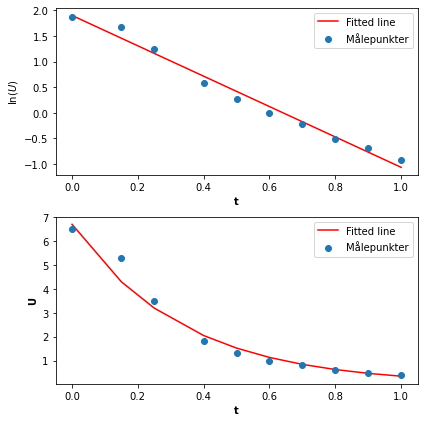

In [2]:
U = np.array([6.5, 5.3, 3.5, 1.8, 1.3, 1.0, 0.8, 0.6, 0.5, 0.4])    # Påfunnede verdier for U for å teste kode
t = np.array([0, 0.15, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])    # -||-
C = 1e-1    # Antar en størrlese C så jeg kan få en verdi

def get_R_from_U_and_t(t, U):
    fig, (ax1, ax2) = plt.subplots(2,1, figsize=(6,6))
    logU = np.log(U)
    
    ax1.scatter(t, logU, zorder=3, label='Målepunkter')
    ax1.set_xlabel('t', weight='bold'); ax1.set_ylabel(r'$\ln(U)$', weight='bold')

    ax2.scatter(t, U, zorder=3, label='Målepunkter')
    ax2.set_xlabel('t', weight='bold'); ax2.set_ylabel('U', weight='bold')

    fig.tight_layout()
    
    p = np.polyfit(t, logU, 1)
    logfit = np.poly1d(p)
    Ufit = np.exp(logfit(t))
    ax1.plot(t, logfit(t), 'r', label='Fitted line')
    ax2.plot(t, Ufit, 'r', label='Fitted line')
    
    ax1.legend(); ax2.legend()
    print(p)
    tau = -1 / p[0]
    R = tau / C
    return R

R = get_R_from_U_and_t(t,U)
print(f'R = {R:.3f}')

### 1.2.1

[-0.01777898 -1.59595641]
R = 6776651.044


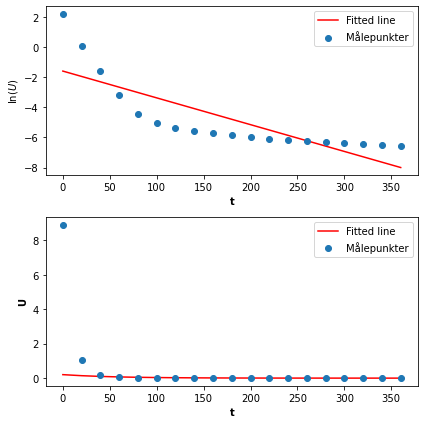

In [3]:
# Målinger fra lab
C = 8.3e-6     # F
t = np.linspace(0, 360, 19)
V = np.array([8913, 1081, 203, 42.6, 11.7, 6.42, 
              4.75, 3.87, 3.29, 2.88, 2.55, 2.31, 
              2.11, 1.94, 1.80, 1.69, 1.58, 1.49, 1.41]) * 10**(-3)   # Volt 

R = get_R_from_U_and_t(t,V)
print(f'R = {R:.3f}')

## 2 Indre resistans i et amperemeter 

### 2.1.1
For å finne resistans i et amperemeter kan vi bruke Ohms lov, som forteller oss at spenningsfallet $V$ over motstanden $R$ er det samme som strømmen som går gjennom, rettere sagt gjennom relasjonen $U = R_AI$, som gir oss motstanden $R_A=\frac{U}{I}$.

[-1.94  2.85]
R = -1.940


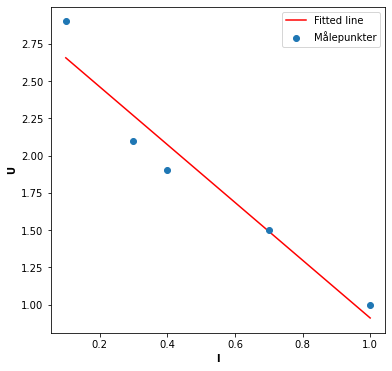

In [4]:
U = np.array([2.9, 2.1, 1.9, 1.5, 1.0])    # Påfunnede verdier for U for å teste kode
I = np.array([0.1, 0.3, 0.4, 0.7, 1.0])    # -||-

def get_R_from_U_and_I(I, U):
    fig, ax = plt.subplots(1,1, figsize=(6,6))
    p = np.polyfit(I, U, 1)
    R = p[0]
    ax.scatter(I, U, label='Målepunkter', zorder=3)
    print(p)
    linefit = np.poly1d(p)
    ax.plot(I, linefit(I), 'r', label='Fitted line')
    ax.set_xlabel('I', weight='bold'); ax.set_ylabel('U', weight='bold')
    ax.legend()
    return R
    
    
R = get_R_from_U_and_I(I, U)
print(f'R = {R:.3f}')

### 2.2.1

[-11.5306474   -0.01522292]
R = -11.531


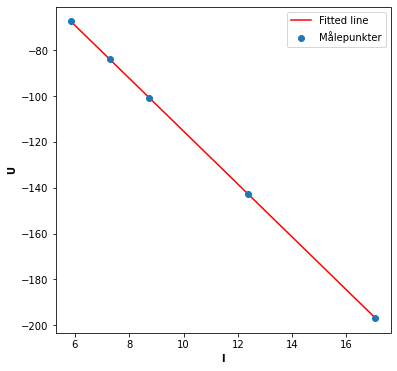

In [5]:
# Målinger fra laben 
I = np.array([17.064, 12.362, 8.7458, 7.2779, 5.8527])
U = np.array([-196.78, -142.55, -100.85, -83.941, -67.505])

R = get_R_from_U_and_I(I, U)
print(f'R = {R:.3f}')

## 3 Indre resistans i et termoelement (Peltier-element)

### 3.1.1
Vi kobler et Voltmeter over Peltier-elementet, og måler spenningsfallet $U$. På den ene siden av Peltier-elementet vil potensialet være $V_0 = 0$, siden vi definerer nullpunktet slik. Derimot på den andre siden er potensialet $\epsilon$, også et spenningsfall over motstanden $r$. Det vil også gå en strøm $I$ gjennom Peltier-elementet. På den ene siden har vi at potensialet er $V_0 = 0$. På andre siden har vi potensialet $\epsilon - rI$. Differansen i disse to potensialene er $U = \epsilon - rI - V_0$, som gir oss spenningen $U = \epsilon - rI$ over Peltier-elementet. Plotter vi så $U$ på $I$ vil vi få en rett linje, der $r$ er stigningstallet og $\epsilon$ er skjæringspunktet.

### 3.1.2
Vi lager et Python-script som finner $r$ og $\epsilon$ ut ifra målte datapunkter i $U$ og $I$ gitt sammenhengen fra oppgave 3.1.1

r = -17.585, emf = 6.746


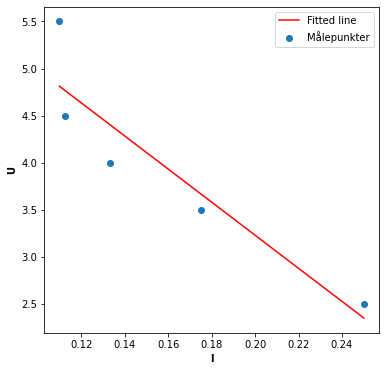

In [6]:
U = np.array([5.5, 4.5, 4, 3.5, 2.5])    # Påfunnede verdier for U for å teste kode
R = np.array([50, 40, 30, 20, 10])    # -||-

def get_emf_and_r_from_U_and_R(R, U):
    fig, ax = plt.subplots(1,1, figsize=(6,6))
    I = U / R
    ax.scatter(I, U, label='Målepunkter', zorder=3)
    p = np.polyfit(I, U, 1)
    linefit = np.poly1d(p)
    ax.plot(I, linefit(I), 'r', label='Fitted line')
    ax.set_xlabel('I', weight='bold'); ax.set_ylabel('U', weight='bold')
    ax.legend()
    r, emf = p
    return r, emf

r, emf = get_emf_and_r_from_U_and_R(R, U)
print(f'r = {r:.3f}, emf = {emf:.3f}')

### 3.2.1
Spenning kun Peltier: Stabil spenning

Peltier i åpen håndflate: Høyere spenning 

Peltier mellom to håndflater: Spenningen synker 

Peltier-element til strømkilde: Temperaturforskjell i Peltier elementet


Peltier element:

Endring i temperatur $\rightarrow$ endring i spenning 
Endring i spenning  $\rightarrow$ endring i temperatur
Derfor ser vi lav spenning når temperatur er lik på begge sider, og høy spenning når det er stor temperaturforskjell. Prosessen er også reversibel, s.a høy spenning inn i Peltier-elementer fører til høy temperaturforskjell, og lav spenning til lav temperaturforskjell

### 3.2.2

r = -26.669, emf = -0.280


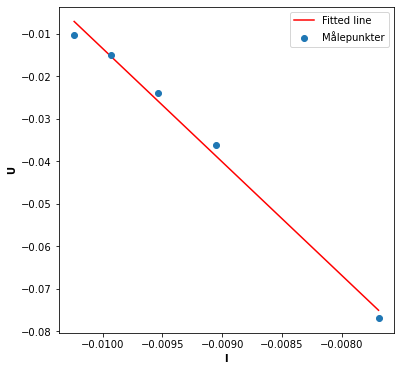

In [7]:
# Målinger fra lab
R = np.array([1.0, 1.5, 2.5, 4, 10])
V = np.array([-10.24, -14.9, -23.84, -36.2, -76.9]) * 10**(-3)

r, emf = get_emf_and_r_from_U_and_R(R, V)
print(f'r = {r:.3f}, emf = {emf:.3f}')

## 4 Firepunktsmåling av resistans

In [8]:
# Ingen oppgaver før lab

### 4.2.1
Måling av resistans i kobberstav:

Topunktsmåling P, P1:
I = 0.813A, V = -0.028mV, R = -0.034m$\omega$
I = 0.511, V = -0.019mV, R = -0.037m$\omega$

Firepunktsmåling C, C1:
I = 0.813A, V = -0.776mV, R = -0.95m$\omega$
I = 0.510A, V = -0.565mV, R = -1.107m$\omega$

### 4.2.2
Rakk ikke samme målinger for Aluminium.

## 5 Måling av jordas magnetfelt 

Vi har at den induserte emfen i spolen er $\epsilon = -\frac{d\phi}{dt}$, og at fluksen $\phi$ gjennom spolen er gitt som $\phi = NAB\cos(\theta)$ der $N$ er antall vindinger rundt spolen, $A$ er arealet på spolen, $B$ er størrelsen på feltet og $\theta$ er vinkelen mellom spolen og det planet spolen lager når magnetfeltet og flatenormalen er parallelle. Vi roterer spolen om en akse $ab$ som står vinkelrett på feltet.
Videre roterer vi spolen om aksen $ab$ med en konstant vinkelfart $\omega$. Det betyr at vi kan skrive vinkelen $\theta$ som $\theta = \omega t$, og sette det inn i uttrykket for $\phi$. Da får vi dette uttrykket for $\phi$:

$\phi = NAB\cos(\omega t)$ 

Vi antar at emfen som funksjon av tid vil se ut som en sinuskurve med amplitude $X$.
Setter vi inn uttrykket for $\phi$ inn i $\epsilon = -\frac{d\phi}{dt}$ får vi:

\begin{align*}
\epsilon &= -\frac{d\phi}{dt} \\ 
         &= -\frac{d}{dt}(NAB\cos\omega t) \\ 
         &= \omega NAB\sin\omega t
\end{align*}

Siden vi har antatt en emf på formen $\epsilon = X\sin(at)$ kan vi matche koeffisientene og få likningen
$X = \omega NAB$, og også likningen for $B$, $B = \frac{X}{\omega NA}$.

### 5.2.1
Måler at $X=-3.20mV$, og har at $A\cdot N = 30m^2$, og $\omega = 2.18rad/s$. Setter inn i
$B = \frac{X}{\omega NA} = \frac{-3.20\cdot10^{-3}}{2.18\cdot30} = -4.8929\cdot10^{-5}T$